In [1]:
library(readxl)
library(dplyr)

customer_r <- read_excel("customer_r.xlsx")
reservation_r <- read_excel("reservation_r.xlsx")
order_info_r <- read_excel("order_info_r.xlsx")
item_r <- read_excel("item_r.xlsx")
colnames(customer_r) <- tolower(colnames(customer_r))
colnames(reservation_r) <- tolower(colnames(reservation_r))
colnames(order_info_r) <- tolower(colnames(order_info_r))
colnames(item_r) <- tolower(colnames(item_r))

Warning message:
"package 'readxl' was built under R version 3.6.3"Warning message:
"package 'dplyr' was built under R version 3.6.3"
Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



In [3]:
head(customer_r)

customer_id,customer_name,phone_number,email,first_reg_date,sex_code,birth,job,zip_code
W1346506,고객71,010-1111-1181,scust71@sfnb.co.kr,19/09/01,F,19820922,자영업,122100
W1347648,고객72,010-1111-1182,scust72@sfnb.co.kr,19/09/04,M,19940812,학생,140100
W1347756,고객73,010-1111-1183,scust73@sfnb.co.kr,19/09/05,M,19931217,NA,152100
W1347984,고객74,010-1111-1184,scust74@sfnb.co.kr,19/09/06,M,19810822,자영업,130100
W1348303,고객75,010-1111-1185,scust75@sfnb.co.kr,19/09/07,M,19900611,NA,121100
W1348424,고객76,010-1111-1186,scust76@sfnb.co.kr,19/09/08,M,19730422,NA,139100


In [4]:
# 산점도 데이터 준비하기
install.packages("ggplot2") 

library(ggplot2)  

Installing package into 'C:/Users/samsung/Documents/R/win-library/3.6'
(as 'lib' is unspecified)


package 'ggplot2' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\samsung\AppData\Local\Temp\RtmpcXNQh0\downloaded_packages


Warning message:
"package 'ggplot2' was built under R version 3.6.3"

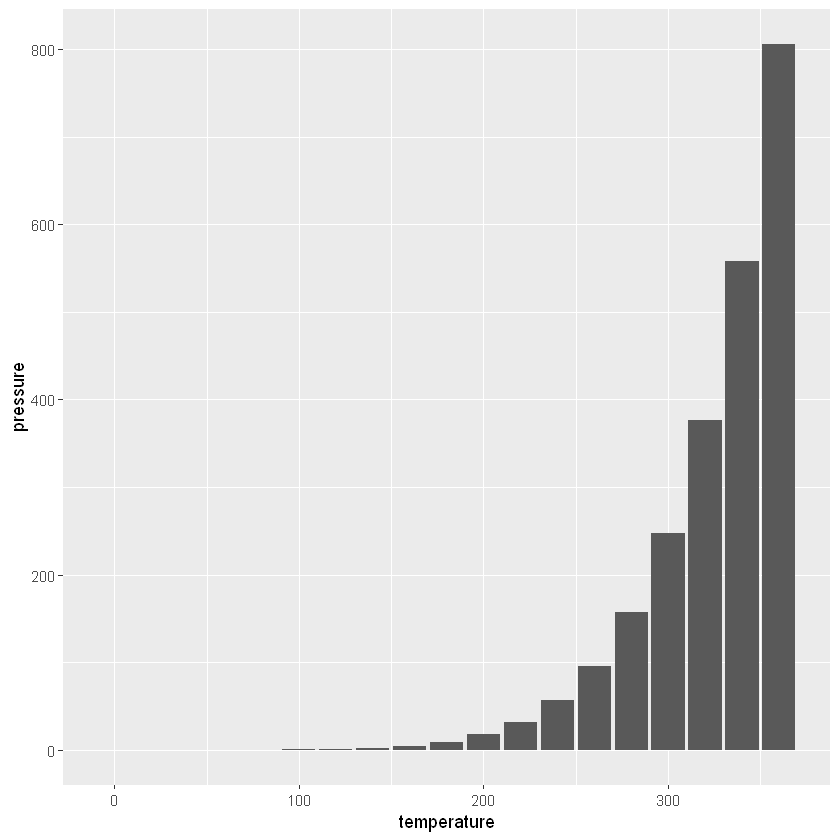

In [7]:
ggplot(data = pressure, aes(x = temperature, y = pressure)) +
geom_col()

In [8]:
# 산점도 그래프 그리기
df_cfm_order <- inner_join(reservation_r, order_info_r, by = "reserv_no") %>%
    select(customer_id, reserv_no, visitor_cnt, cancel, order_no, item_id, sales) %>%
arrange(customer_id, reserv_no, item_id)

    head(df_cfm_order)  

customer_id,reserv_no,visitor_cnt,cancel,order_no,item_id,sales
W1327595,2019061801,2,N,190618107186310010,M0001,48000
W1327595,2019071801,4,N,190718107186310010,M0005,140000
W1327803,2019060301,4,N,190603578341100100,M0005,140000
W1327803,2019091506,2,N,190915137187310010,M0005,70000
W1328432,2019060601,4,N,190606607189610010,M0005,140000
W1328432,2019060601,4,N,190606607189610010,M0010,12000


In [10]:
df_sct_graph <- df_cfm_order %>% 
group_by(customer_id) %>% 
summarise(vst_cnt = sum(visitor_cnt), cust_amt = sum(sales/1000))

head(df_sct_graph)

customer_id,vst_cnt,cust_amt
W1327595,6,188
W1327803,6,210
W1328432,20,246
W1328505,20,287
W1328786,1,10
W1328985,8,178


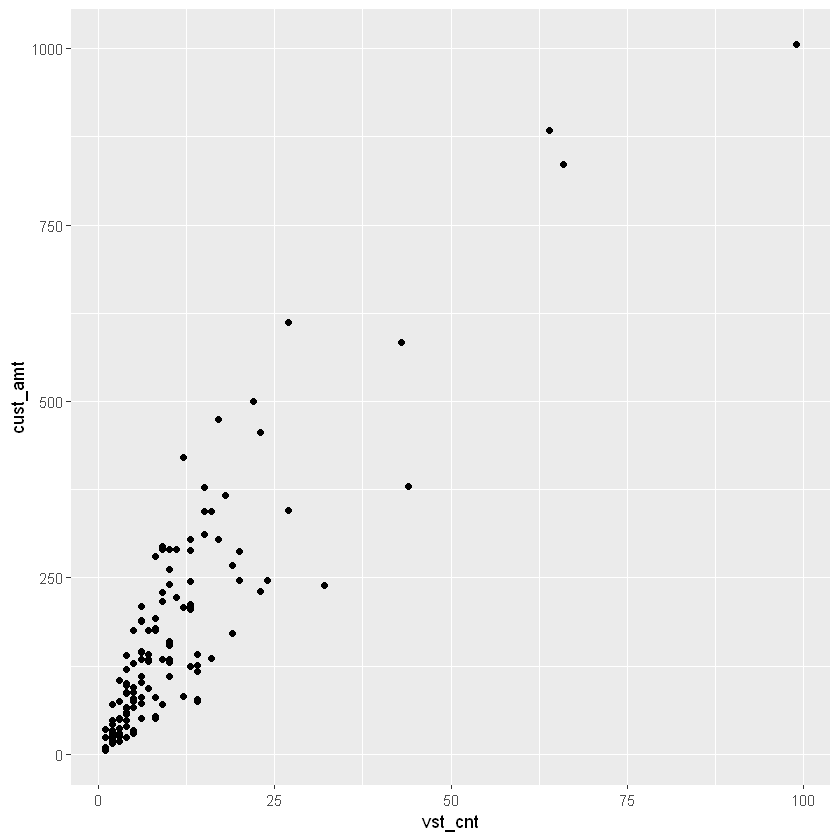

In [13]:
ggplot(data = df_sct_graph, aes(x = vst_cnt, y = cust_amt)) +
geom_point()

Warning message:
"Removed 5 rows containing missing values (geom_point)."

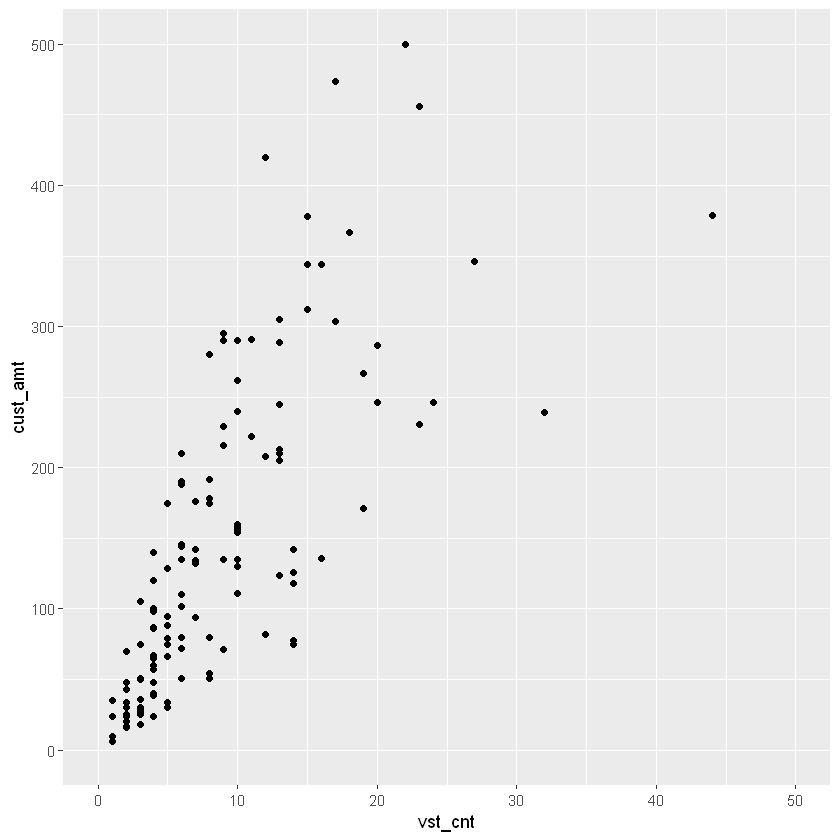

In [14]:
ggplot(data = df_sct_graph, aes(x = vst_cnt, y = cust_amt)) +
geom_point()+
xlim(0,50) + ylim(0,500)

In [15]:
# 산점도 그래프에 색상 적용하기
head(customer_r)

customer_id,customer_name,phone_number,email,first_reg_date,sex_code,birth,job,zip_code
W1346506,고객71,010-1111-1181,scust71@sfnb.co.kr,19/09/01,F,19820922,자영업,122100
W1347648,고객72,010-1111-1182,scust72@sfnb.co.kr,19/09/04,M,19940812,학생,140100
W1347756,고객73,010-1111-1183,scust73@sfnb.co.kr,19/09/05,M,19931217,NA,152100
W1347984,고객74,010-1111-1184,scust74@sfnb.co.kr,19/09/06,M,19810822,자영업,130100
W1348303,고객75,010-1111-1185,scust75@sfnb.co.kr,19/09/07,M,19900611,NA,121100
W1348424,고객76,010-1111-1186,scust76@sfnb.co.kr,19/09/08,M,19730422,NA,139100


In [16]:
# 성별 추가
df_sct_graph2 <- inner_join(df_sct_graph, customer_r, by = "customer_id") %>% 
select(vst_cnt, cust_amt, sex_code)

head(df_sct_graph2)

vst_cnt,cust_amt,sex_code
6,188,M
6,210,M
20,246,M
20,287,F
1,10,M
8,178,M


Warning message:
"Removed 5 rows containing missing values (geom_point)."

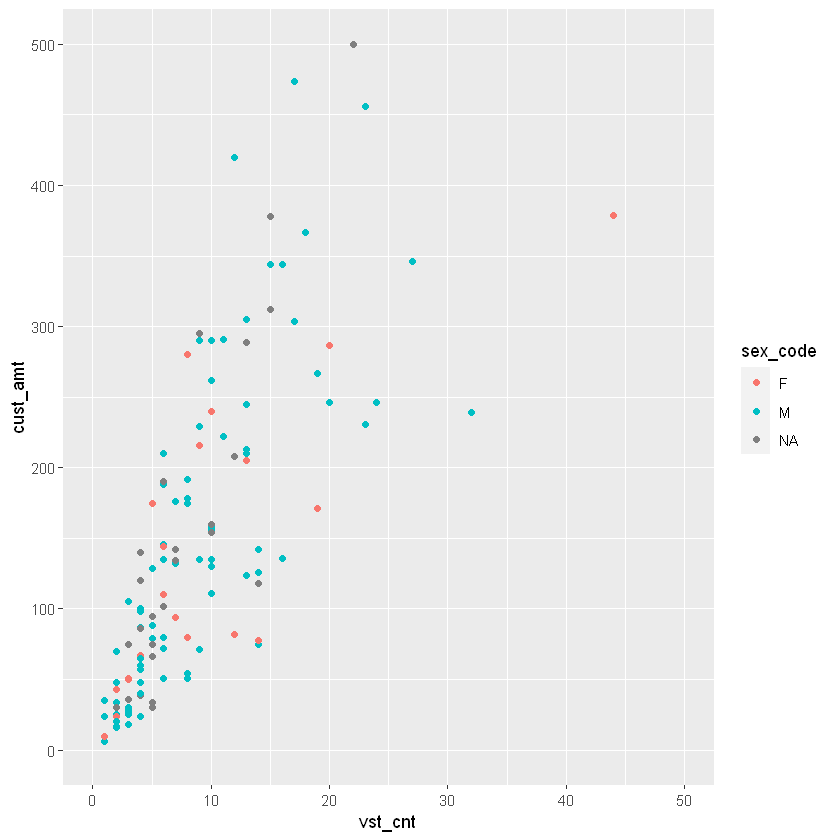

In [20]:
# 그룹별로 색상 적용
ggplot(data = df_sct_graph2, aes(x = vst_cnt, y = cust_amt, color = sex_code)) +
geom_point() +
xlim(0, 50) +
ylim(0, 500)

In [22]:
# 1. 막대 그래프 데이터 준비하기
# 예약 완료, 주문 완료 데이터 연결
df_branch_sales_1 <- inner_join(reservation_r, order_info_r, by = "reserv_no") %>% 
select(branch, sales) %>%
arrange(branch, sales)
  
# 지점별로 매출 합산
df_branch_sales_2 <- df_branch_sales_1 %>% group_by(branch) %>%
summarise(amt = sum(sales) / 1000) %>%
arrange(desc(amt))

df_branch_sales_2     # 데이터셋 확인

branch,amt
강남,4074
영등포,1516
종로,1428
용산,1366
서초,1295
송파,1190
서대문,1180
동작,1149
관악,1101
노원,1054


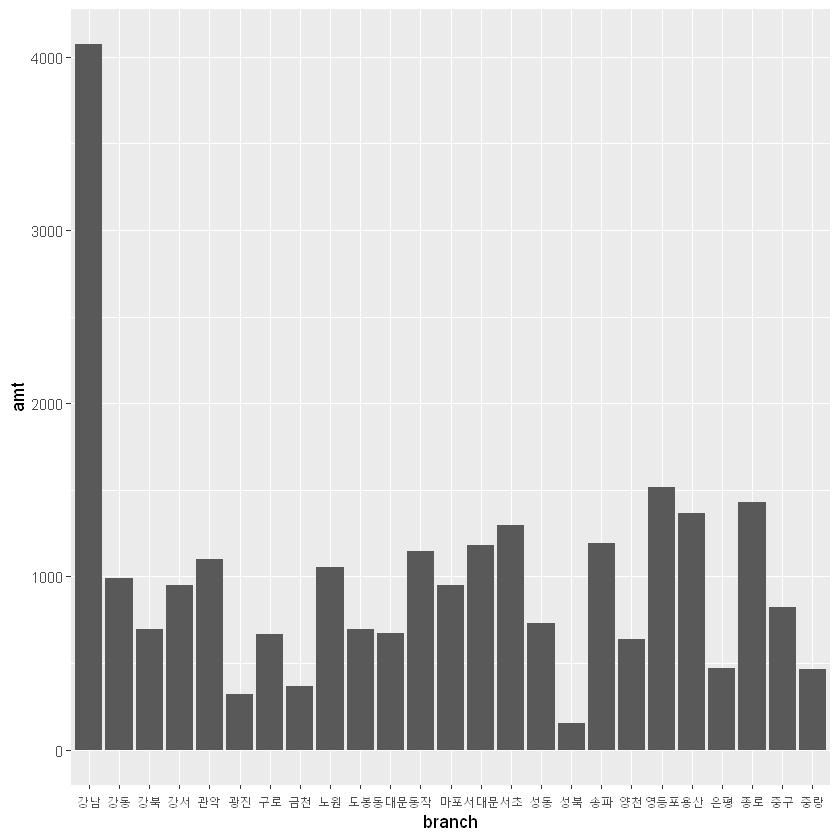

In [23]:
# 막대 그래프로 그리기
ggplot(df_branch_sales_2, aes(x = branch, y = amt)) + geom_bar(stat = "identity")

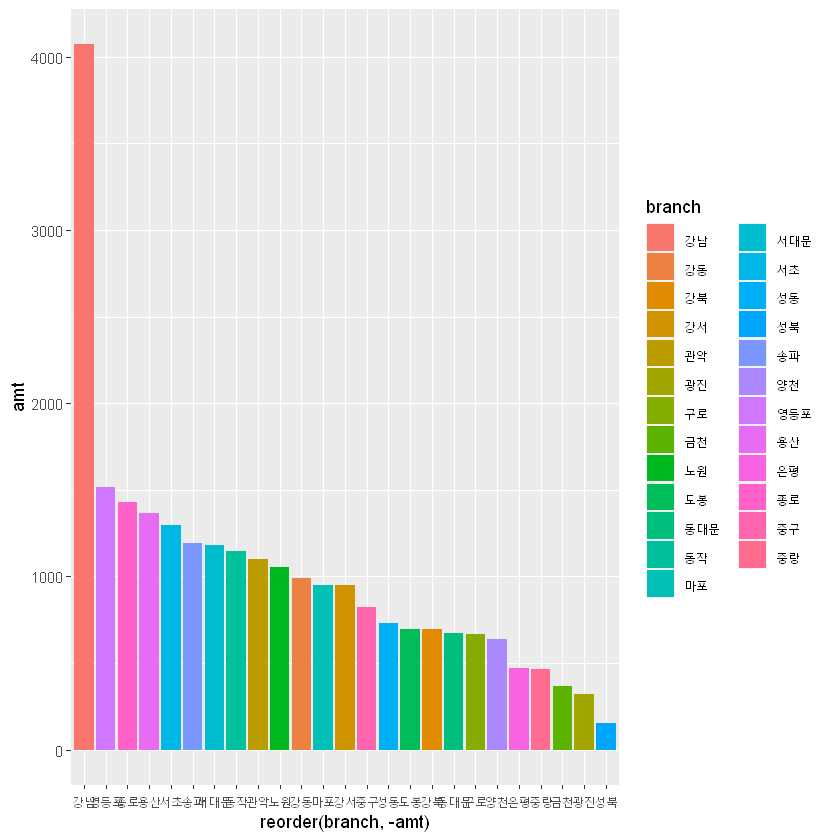

In [25]:
# 자동으로 막대 그래프에 색상 채우기
ggplot(df_branch_sales_2, aes(x = reorder(branch, -amt), y = amt, fill = branch))  +
geom_bar(stat = "identity")

Warning message:
"Removed 20 rows containing missing values (position_stack)."

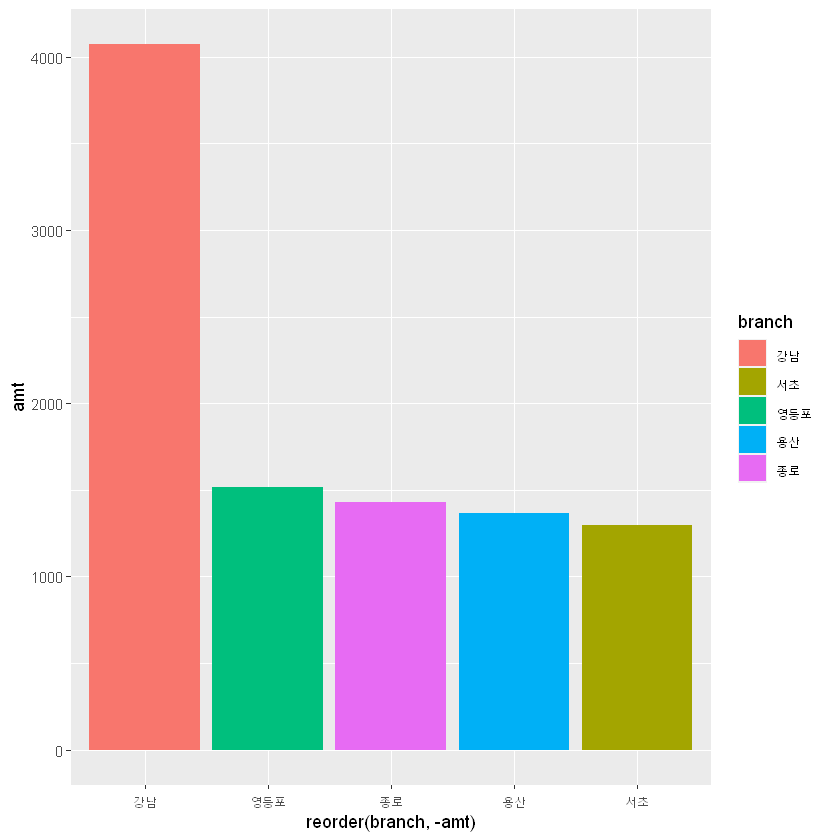

In [29]:
# 막대 그래프 일부 선택
ggplot(df_branch_sales_2, aes(x = reorder(branch, -amt), y = amt, fill = branch))  +
geom_bar(stat = "identity") +
xlim(c("강남","영등포","종로","용산","서초"))

Warning message:
"Removed 20 rows containing missing values (position_stack)."

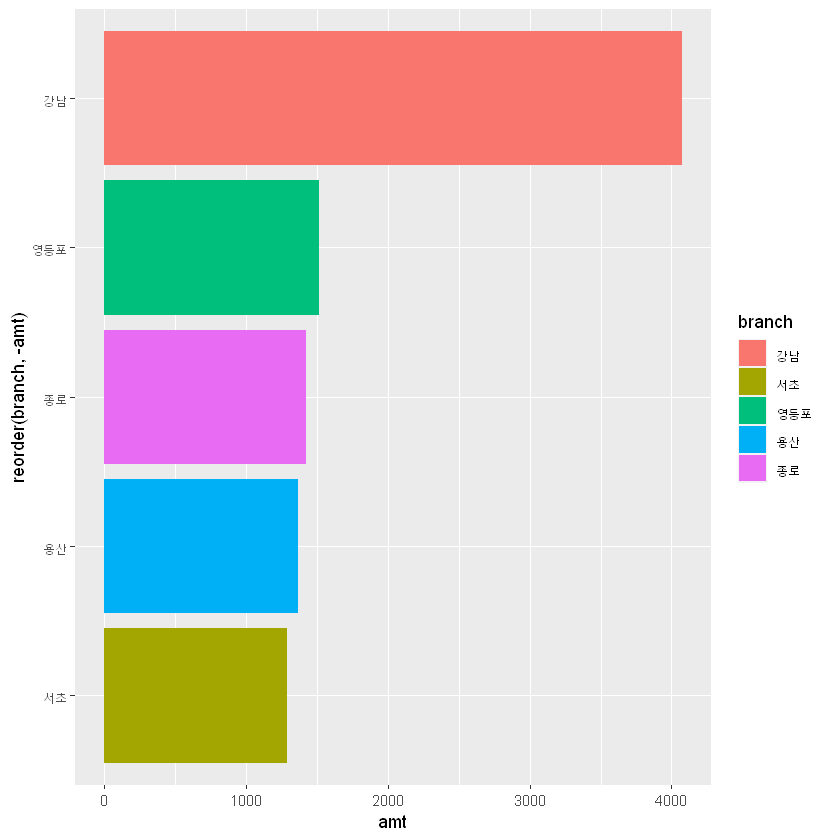

In [33]:
# 가로 막대 그래프 그리기
gg <- ggplot(df_branch_sales_2, aes(x = reorder(branch, -amt), y = amt, fill = branch)) +
geom_bar(stat = "identity") +
xlim(c("서초", "용산", "종로", "영등포", "강남"))

# x축과 y축을 바꿈
gg <- gg + coord_flip()
gg

Warning message:
"Removed 20 rows containing missing values (position_stack)."

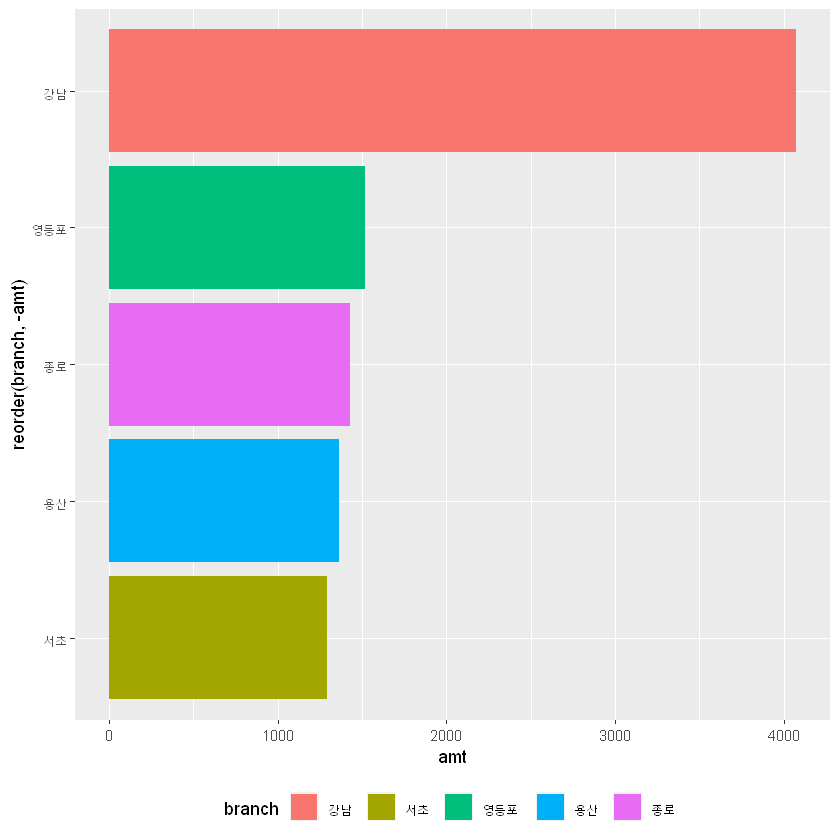

In [34]:
# 범례 위치 바꾸기 (legend)
# 정중앙을 중심으로 오른쪽("right"), 아래쪽("bottom"), 왼쪽("left"), 위쪽("top") 옵션으로 설정
gg <- gg + theme(legend.position = "bottom")
gg

Warning message:
"Removed 20 rows containing missing values (position_stack)."

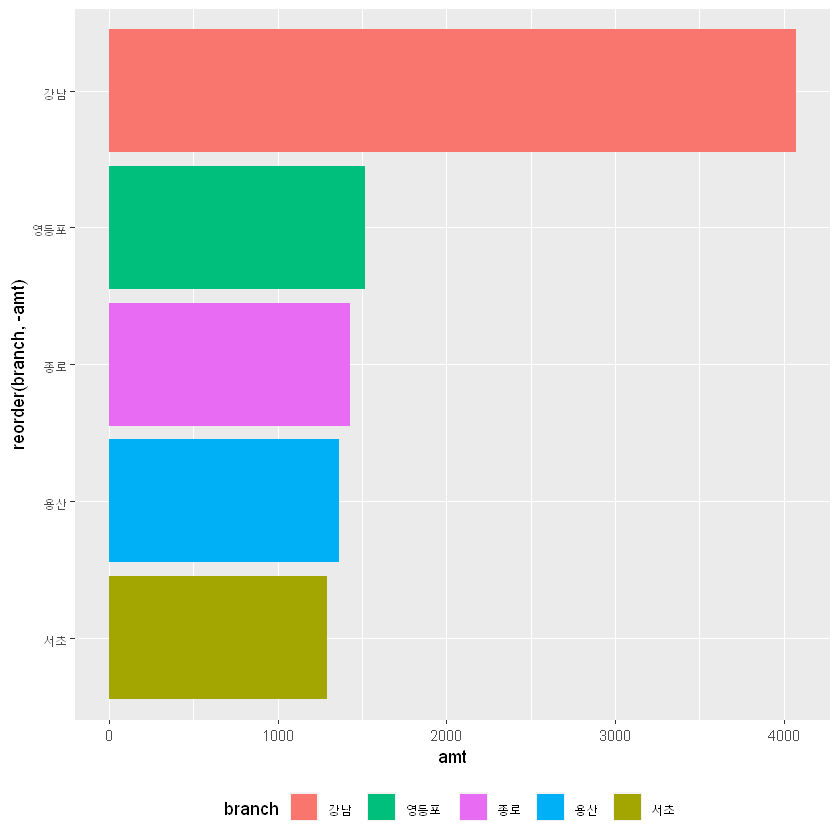

In [35]:
# 범례 항목 순서 바꾸기
gg <- gg + scale_fill_discrete(breaks = c("강남", "영등포", "종로", "용산", "서초"))
gg

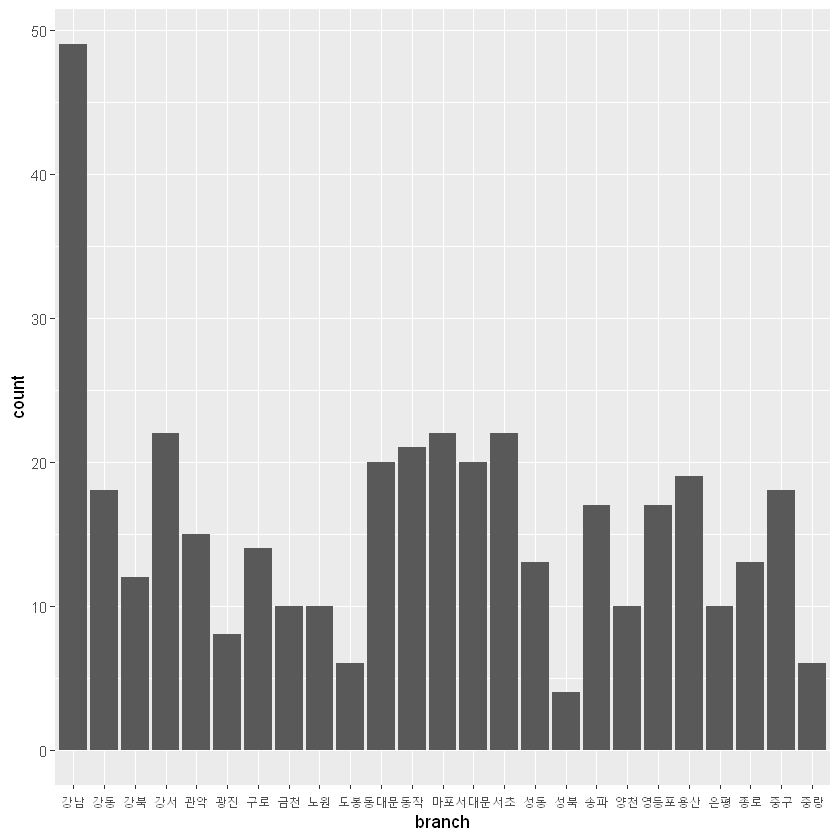

In [36]:
# 지점 예약 건수 히스토그램
gg <- ggplot(data = reservation_r, aes(x = branch)) + geom_bar(stat = "count")
gg

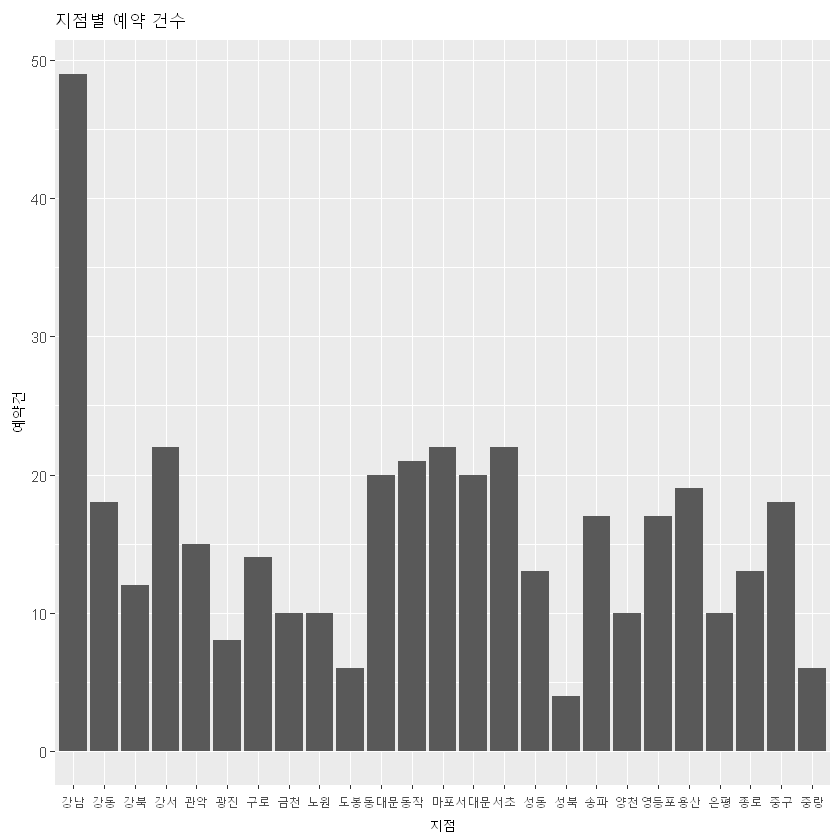

In [37]:
# x축과 y축 이름 바꾸기
gg <- ggplot(data = reservation_r, aes(x = branch)) + 
        geom_bar(stat = "count") +
        labs(title = "지점별 예약 건수", x = "지점", y = "예약건")
gg

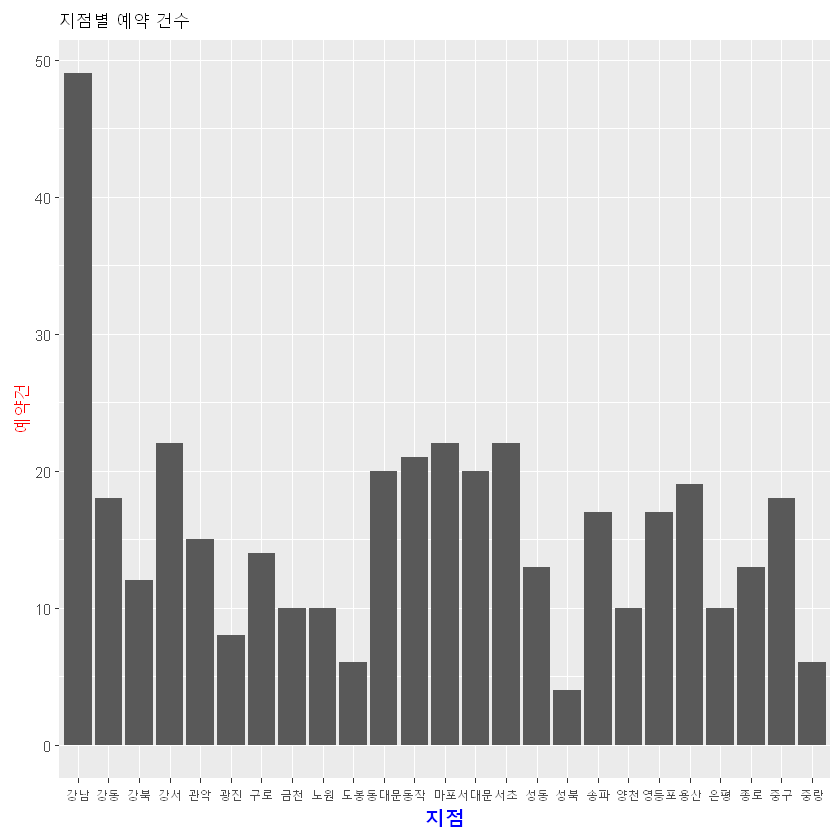

In [38]:
# 세부 사항 조정
gg <- gg + theme(axis.title.x = element_text(size = 15,
                                             color = "blue",
                                             face = 'bold',
                                             angle = 0) ,
                 axis.title.y = element_text(size = 13,
                                             color = 'red',
                                             angle = 90)
                )

gg


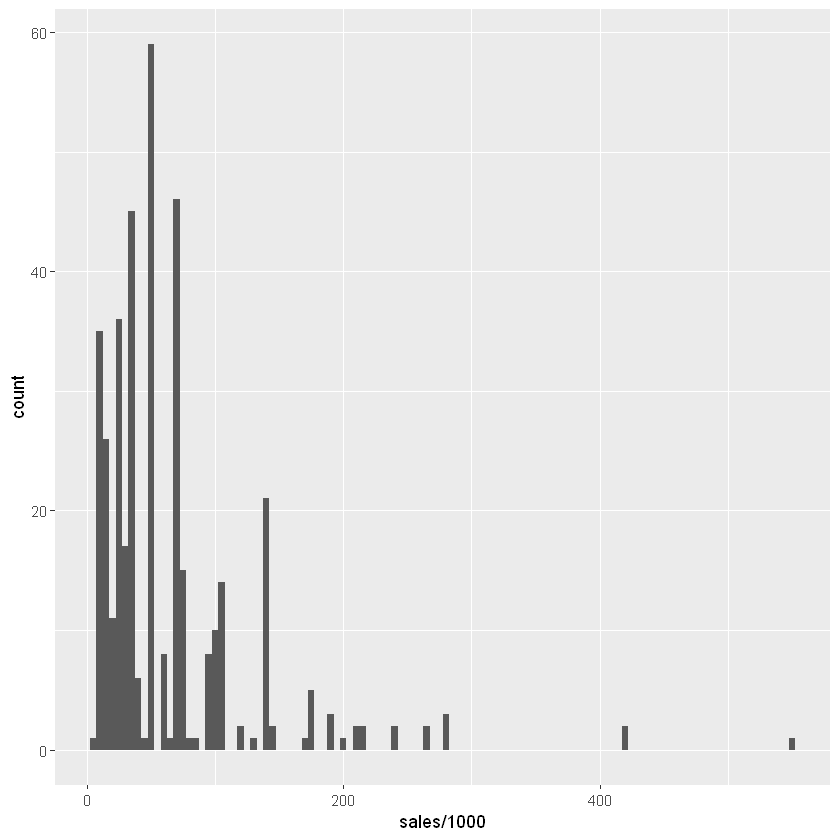

In [40]:
# 3 geom_histogram( ) 함수로 연속형 데이터의 히스토그램 그리기
ggplot(data = order_info_r, aes(x = sales/1000)) + geom_histogram(binwidth = 5)

In [42]:
# 파이 차트: 상대적 크기 확인
# 1 파이 차트 데이터 준비하기
df_pie_graph <- inner_join(order_info_r, item_r, by = "item_id") %>% 
group_by(item_id, product_name) %>% 
summarise(amt_item = sum(sales/1000)) %>% 
select(item_id, amt_item, product_name)

df_pie_graph

`summarise()` has grouped output by 'item_id'. You can override using the `.groups` argument.


item_id,amt_item,product_name
M0001,5808,SPECIAL_SET
M0002,1968,PASTA
M0003,1666,PIZZA
M0004,1625,SEA_FOOD
M0005,9380,STEAK
M0006,2075,SALAD_BAR
M0007,525,SALAD
M0008,610,SANDWICH
M0009,856,WINE
M0010,444,JUICE


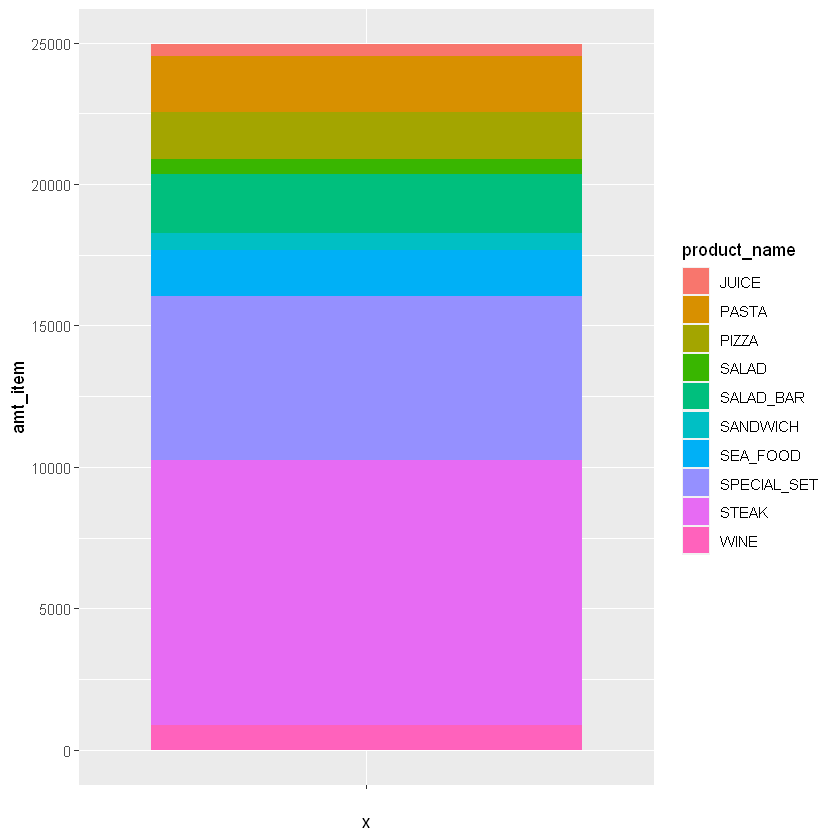

In [43]:
# 2 누적 막대 그래프 그리기
ggplot(df_pie_graph, aes(x = "", y = amt_item, fill = product_name)) +
geom_bar(stat = "identity")

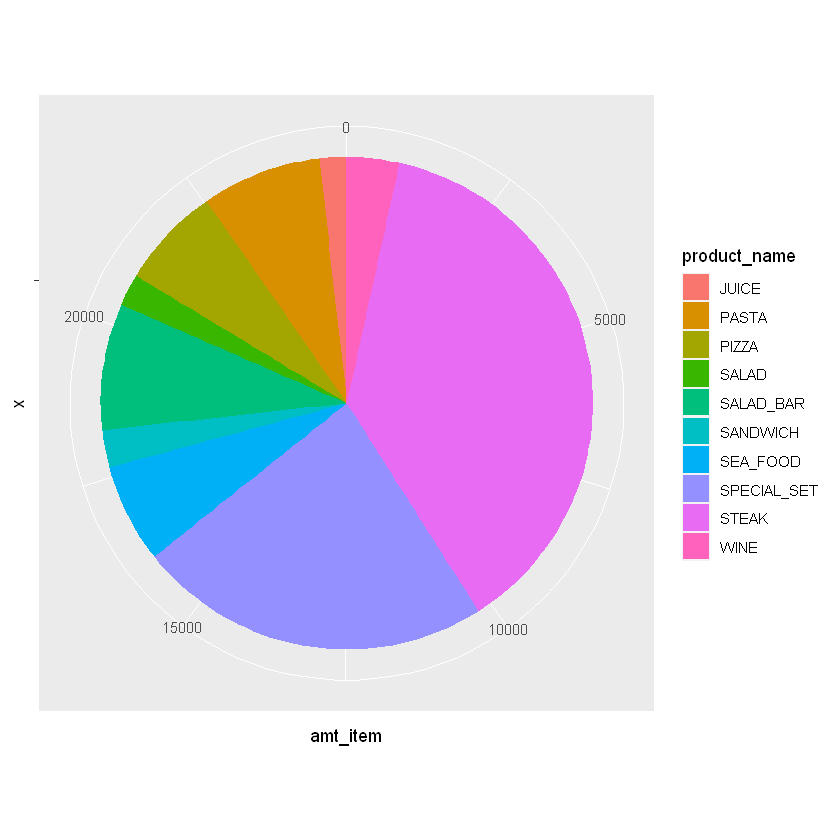

In [46]:
# # 파이 차트 그리기
gg <- ggplot(df_pie_graph, aes(x = "", y = amt_item, fill = product_name)) +
geom_bar(stat = "identity") + 
coord_polar("y", start = 0)

gg

Scale for 'fill' is already present. Adding another scale for 'fill', which
will replace the existing scale.


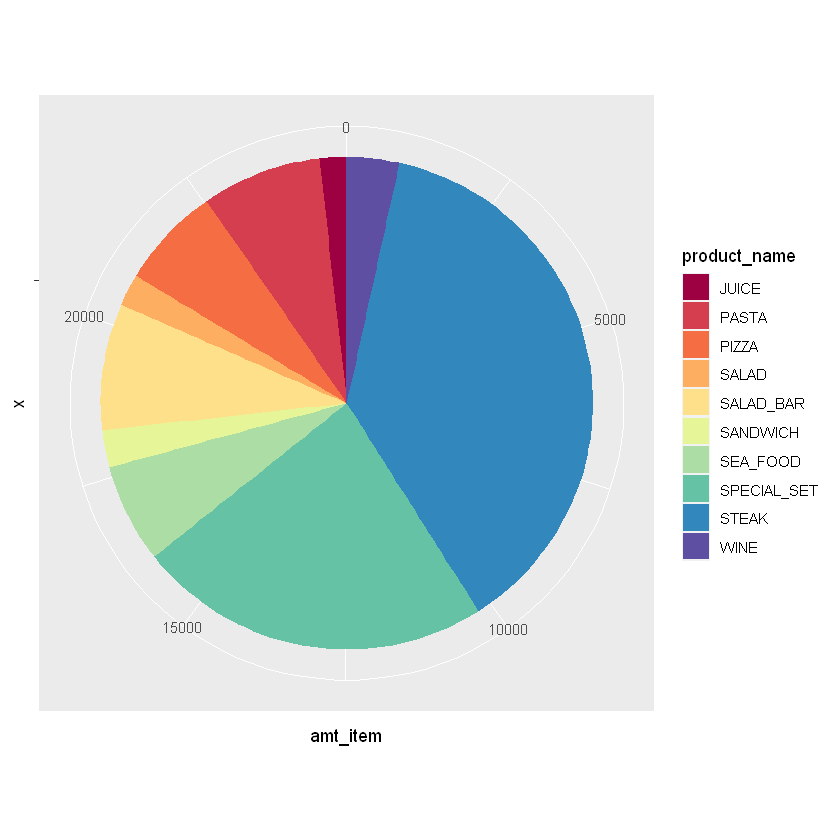

In [49]:
# Spectral 색상 팔레트로 채움, direction = -1을 적용하면 팔레트 순서가 바뀜
gg <- gg + scale_fill_brewer(palette = "Spectral")
gg

<ggproto object: Class ScaleDiscrete, Scale, gg>
    aesthetics: fill
    axis_order: function
    break_info: function
    break_positions: function
    breaks: waiver
    call: call
    clone: function
    dimension: function
    drop: TRUE
    expand: waiver
    get_breaks: function
    get_breaks_minor: function
    get_labels: function
    get_limits: function
    guide: legend
    is_discrete: function
    is_empty: function
    labels: waiver
    limits: NULL
    make_sec_title: function
    make_title: function
    map: function
    map_df: function
    n.breaks.cache: NULL
    na.translate: TRUE
    na.value: NA
    name: waiver
    palette: function
    palette.cache: NULL
    position: left
    range: <ggproto object: Class RangeDiscrete, Range, gg>
        range: NULL
        reset: function
        train: function
        super:  <ggproto object: Class RangeDiscrete, Range, gg>
    rescale: function
    reset: function
    scale_name: brewer
    train: function
    train_d

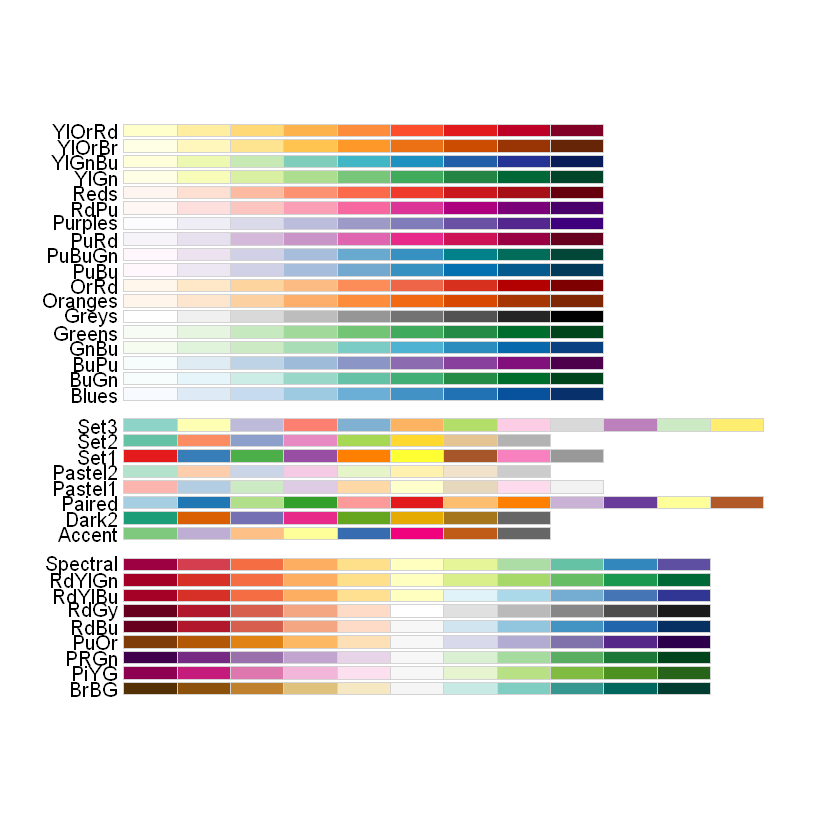

In [52]:
# R 팔레트 색상표
library(RColorBrewer)
display.brewer.all()

Scale for 'fill' is already present. Adding another scale for 'fill', which
will replace the existing scale.
Warning message in RColorBrewer::brewer.pal(n, pal):
"n too large, allowed maximum for palette Oranges is 9
Returning the palette you asked for with that many colors
"

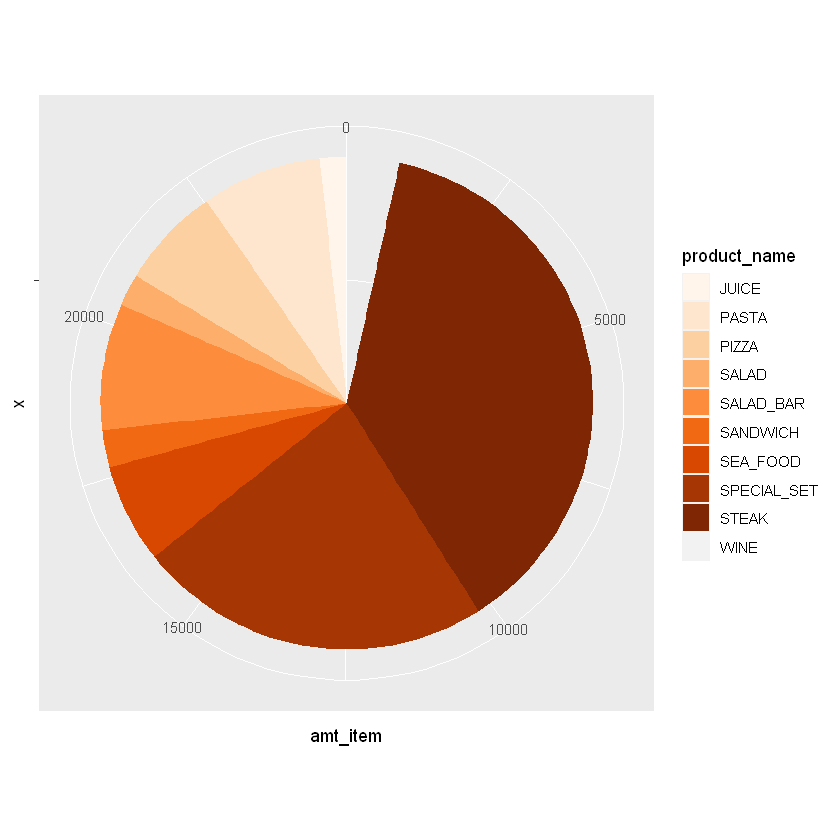

In [58]:
gg <- gg +  scale_fill_brewer(palette = "Oranges")
gg